<a href="https://colab.research.google.com/github/1991ta/hello/blob/master/Module3_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 23 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd6

In [ ]:
# print(G[2])
# print(G[6])
# print(G[10])
type(G[2])

networkx.classes.graph.Graph

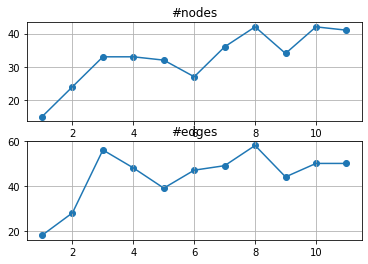

In [ ]:
nodes = []
edges = []
for i in range(1,12):
  nodes.append(G[i].number_of_nodes())
  edges.append(G[i].number_of_edges())

plt.figure(1)
# linear
plt.subplot(211)
plt.plot(range(1,12),nodes)
plt.scatter(range(1,12),nodes)
plt.yscale('linear')
plt.title('#nodes')
plt.grid(True)


# log
plt.subplot(212)
plt.plot(range(1,12),edges)
plt.scatter(range(1,12),edges)
plt.yscale('linear')
plt.title('#edges')
plt.grid(True)

In [ ]:
i=4
nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels=True)  


In [ ]:
nx.degree_centrality(G[9])
nx.eigenvector_centrality(G[3])
nx.betweenness_centrality(G[1], normalized = True)

In [70]:
# defining an array of indexes (nodes) and columns (phases) of Data frame 
mylist = []
for i in range(1,12):
  mylist.append(list(nx.betweenness_centrality(G[i], normalized = True).keys()))
 
my_rows = np.unique(np.concatenate(mylist))

mylist2 = [] 
for i in range(1,12):
  mylist2.append('phase'+str(i))

my_columns = np.array(mylist2)

In [ ]:
df_btw = pd.DataFrame(index = my_rows, columns = my_columns)
for i in my_rows:
  for j in range(1,12):
    # print(i,j)
    # print(my_rows)
    # print(my_columns)
    try:
      df_btw.loc[i,my_columns[j-1]] = nx.betweenness_centrality(G[j], normalized = True)[i]
    except:
      pass
((df_btw.sum(axis=1))/11).sort_values()    

In [113]:
thresh = 9
titles = list(df_btw.dropna(thresh=thresh).T.columns.values)

titles

['n1', 'n11', 'n12', 'n2', 'n3', 'n6', 'n76', 'n8', 'n83', 'n85']

In [88]:
df_btw.shape


(107, 11)

In [ ]:
df_btw_avg = ((df_btw.sum(axis=1))/11)
df_btw_avg.sort_values()

In [ ]:
df_ev = pd.DataFrame(index = my_rows, columns = my_columns)

for i in my_rows:
  for j in range(1,12):
    try:
      df_ev.loc[i,my_columns[j-1]] = nx.eigenvector_centrality(G[j])[i]
    except:
      pass

((df_ev.sum(axis=1))/11).sort_values()      
    

In [ ]:
df_ev.T

In [ ]:
df_ev_avg = ((df_ev.sum(axis=1))/11)
df_ev_avg.sort_values()

In [ ]:
df_ev.T.dropna(thresh=35).plot(subplots=False, figsize=(40,40))

In [138]:
df_degreeCent = pd.DataFrame(index = my_rows, columns = my_columns)
for i in my_rows:
  for j in range(1,12):
    # print(i,j)
    # print(my_rows)
    # print(my_columns)
    try:
      df_degreeCent.loc[i,my_columns[j-1]] = nx.degree_centrality(G[j])[i]
    except:
      pass

  

In [ ]:
df_degreeCent_avg = ((df_degreeCent.sum(axis=1))/11)
df_degreeCent_avg.sort_values()

In [ ]:
((df_btw.sum(axis=1))/11)


In [ ]:
# plot Betweenness of deifferent nodes through phases
ax = df_btw.dropna(thresh=9).T.plot(subplots=True, figsize=(150,100), layout=(3,4), title=titles, fontsize=80, lw=10)
# edit the legends
[ax.legend(loc=2,prop={'size': 80}) for ax in plt.gcf().axes]


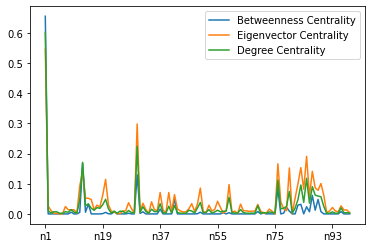

In [152]:
df_btw_avg
df_ev_avg
df_degreeCent_avg
df = pd.concat([df_btw_avg,df_ev_avg,df_degreeCent_avg],axis=1)
df.plot()
plt.legend(['Betweenness Centrality', 'Eigenvector Centrality', 'Degree Centrality'])